In [25]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
from scipy.stats import norm  

tickers = ['TSLA','GME', 'PLTR', 'PLUG']
 

weights = np.array([.3, .10, .15, .45])
 

initial_investment = 1000000
 

data = pdr.get_data_yahoo(tickers, start="2018-01-01", end=dt.date.today())['Close']
 

returns = data.pct_change()

returns.tail()


Symbols,TSLA,GME,PLTR,PLUG
Date,,,,
2021-01-08,0.078403,-0.021571,0.008000,0.137238
2021-01-11,-0.078214,0.127190,0.028968,0.003533
2021-01-12,0.047153,0.000502,0.009641,0.223272
2021-01-13,0.005851,0.573935,-0.025974,0.052711
2021-01-14,-0.011013,0.271019,-0.022745,-0.042590


In [27]:
cov_matrix = returns.cov()
cov_matrix

Symbols,TSLA,GME,PLTR,PLUG
Symbols,,,,
TSLA,0.001854,0.000426,0.000778,0.000676
GME,0.000426,0.003387,0.000036,0.000560
PLTR,0.000778,0.000036,0.004540,0.000854
PLUG,0.000676,0.000560,0.000854,0.002415


In [28]:
avg_rets = returns.mean()
 

port_mean = avg_rets.dot(weights)
 
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
 

mean_investment = (1+port_mean) * initial_investment


stdev_investment = initial_investment * port_stdev

In [30]:
conf_level1 = 0.10

cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

In [31]:
var_1d1 = initial_investment - cutoff1
var_1d1

38721.18364723073

1 day VaR @ 95% confidence: 38721.18
2 day VaR @ 95% confidence: 54760.02
3 day VaR @ 95% confidence: 67067.06
4 day VaR @ 95% confidence: 77442.37
5 day VaR @ 95% confidence: 86583.2
6 day VaR @ 95% confidence: 94847.14
7 day VaR @ 95% confidence: 102446.62
8 day VaR @ 95% confidence: 109520.05
9 day VaR @ 95% confidence: 116163.55
10 day VaR @ 95% confidence: 122447.13
11 day VaR @ 95% confidence: 128423.64
12 day VaR @ 95% confidence: 134134.11
13 day VaR @ 95% confidence: 139611.21
14 day VaR @ 95% confidence: 144881.4
15 day VaR @ 95% confidence: 149966.5


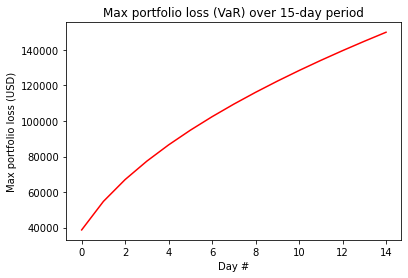

In [32]:

var_array = []
num_days = int(15)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))


plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")

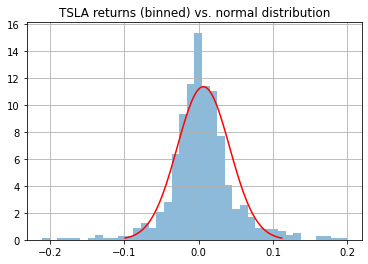

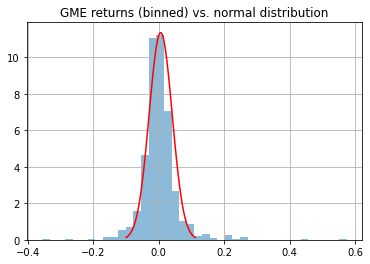

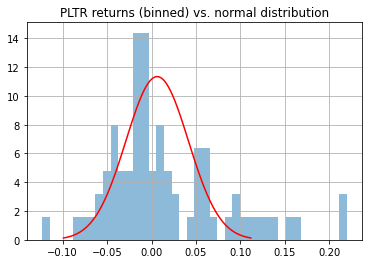

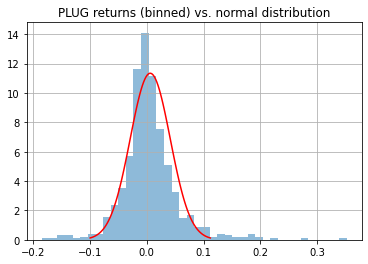

In [39]:
returns['TSLA'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, norm.pdf(x, port_mean, port_stdev), "r")
plt.title("TSLA returns (binned) vs. normal distribution")
plt.show()

returns['GME'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, norm.pdf(x, port_mean, port_stdev), "r")
plt.title("GME returns (binned) vs. normal distribution")
plt.show()

returns['PLTR'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, norm.pdf(x, port_mean, port_stdev), "r")
plt.title("PLTR returns (binned) vs. normal distribution")
plt.show()

returns['PLUG'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, norm.pdf(x, port_mean, port_stdev), "r")
plt.title("PLUG returns (binned) vs. normal distribution")
plt.show()